### Read in data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
#custom style HTML output

from IPython.core.display import HTML

csspath1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-table.css'
csspath2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\style-notebook.css'

css = open(csspath1).read() + open(csspath2).read()
HTML('<style>{}</style>'.format(css))

In [3]:
path1 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\titles.csv'
path2 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\cast.csv'
path3 = r'C:\COURSERA\PYCON2015_TUTORIALS\Brandon Rhodes - Pandas From The Ground Up - PyCon 2015\data\release_dates.csv'

titles = pd.DataFrame.from_csv(path1 , index_col=None)
cast = pd.DataFrame.from_csv(path2, index_col=None)
release_dates = pd.DataFrame.from_csv(path3, index_col=None)

In [4]:
release_dates.head(3)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29


### Date and Time

In [5]:
r = release_dates

In [6]:
r.date = pd.to_datetime(pd.Series(r.date))

In [7]:
r.head(3)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29


In [8]:
r.date.dt.day.head(3)  # show as day of year

0    15
1     5
2    29
Name: date, dtype: int64

### Merging dataframes

In [9]:
c = cast
c = c[c.name == 'Ellen Page']
c.merge(release_dates).head(5)
# merge is the most general function for putting together data
# only use join if you are very comfortable with merge

,title,year,name,type,character,n,country,date
0,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1,Sweden,2007-12-07
1,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1,Greece,2008-05-15
2,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1,Spain,2008-06-13
3,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1,Finland,2008-07-18
4,An American Crime,2007,Ellen Page,actress,Sylvia Likens,1,Mexico,2008-08-08


### Merging with the same dataframe

In [10]:
#who co-stars with Cary Grant?
#you can marge a table with itself
g = cast[(cast.n <= 2) & (cast.name == 'Cary Grant')]
g.head(2)

,title,year,name,type,character,n
763036,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1
763037,Arsenic and Old Lace,1944,Cary Grant,actor,Mortimer Brewster,1


In [11]:
g = g.merge(cast , on=['title','year'])
g.head(3)

,title,year,name_x,type_x,character_x,n_x,name_y,type_y,character_y,n_y
0,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1,Richard (V) Allen,actor,Orphan,NaN
1,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1,Dino Bolognese,actor,Italian TV Commentator,NaN
2,An Affair to Remember,1957,Cary Grant,actor,Nickie Ferrante,1,Fortunio Bonanova,actor,Courbet,8


### Pivot table

In [12]:
p = release_dates[release_dates.title.str.startswith('Star Wars: Episode')]

In [13]:
p = p[p.country.str.startswith('U')]

In [14]:
p.head(5)

,title,year,country,date
285672,Star Wars: Episode I - The Phantom Menace,1999,USA,1999-05-19
285693,Star Wars: Episode I - The Phantom Menace,1999,Uruguay,1999-07-02
285705,Star Wars: Episode I - The Phantom Menace,1999,UK,1999-07-16
285719,Star Wars: Episode I - The Phantom Menace,1999,United Arab Emirates,1999-08-25
285781,Star Wars: Episode II - Attack of the Clones,2002,UK,2002-05-16


In [15]:
p.pivot('title','country','date').head(5)
#does a set index, a sort index and an unstack in a row
#this is a frequent operation
#but only works on 1 circumstance, so better to know set_index/sort_index/unstack
#initially the index is the line number

country,UK,USA,Ukraine,United Arab Emirates,Uruguay
title,,,,,
Star Wars: Episode I - The Phantom Menace,1999-07-16,1999-05-19,NaT,1999-08-25,1999-07-02
Star Wars: Episode II - Attack of the Clones,2002-05-16,2002-05-16,2002-06-08,2002-05-16,2002-07-05
Star Wars: Episode III - Revenge of the Sith,2005-05-19,2005-05-19,NaT,2005-05-19,NaT
Star Wars: Episode V - The Empire Strikes Back,1980-05-21,1980-06-20,NaT,NaT,1981-01-15
Star Wars: Episode VI - Return of the Jedi,1983-06-02,1983-05-25,NaT,NaT,NaT


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

In [16]:
xmas = release_dates[release_dates.title.str.contains('Christmas')]
xmas.head(3)

,title,year,country,date
1003,12 Dog Days of Christmas,2014,USA,2014-11-28
1004,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09
5247,A Belle for Christmas,2014,USA,2014-11-04


In [17]:
xmas['month_of_year'] = xmas.date.dt.month

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
xmas.head(3)

,title,year,country,date,month_of_year
1003,12 Dog Days of Christmas,2014,USA,2014-11-28,11
1004,12 Dogs of Christmas: Great Puppy Rescue,2012,USA,2012-10-09,10
5247,A Belle for Christmas,2014,USA,2014-11-04,11


In [19]:
xmas.groupby(xmas.month_of_year).size()

month_of_year
1      14
2       5
3       4
4       5
5       8
6       8
7       2
8       7
9       7
10     22
11    175
12    321
dtype: int64

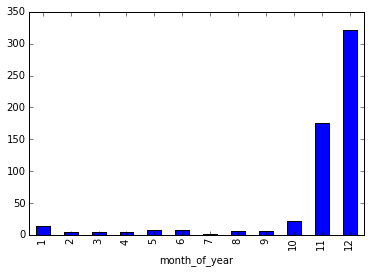

In [84]:
xmas.groupby(xmas.month_of_year).size().plot(kind='bar') #my solution

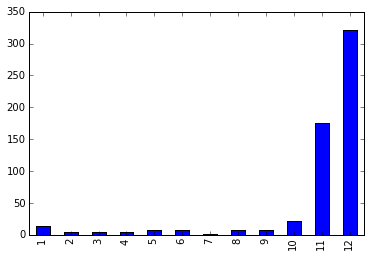

In [85]:
xmas.date.dt.month.value_counts().sort_index().plot(kind='bar')  #suggested solution

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

In [21]:
hobbit = release_dates[release_dates.title.str.startswith('The Hobbit') & (release_dates.country == 'USA')]
hobbit.head(3)

,title,year,country,date
323642,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14
323707,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17
323776,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13


In [47]:
hobbit.month = hobbit.date.dt.month
hobbit.head(3)

,title,year,country,date,month_of_year
323642,The Hobbit: An Unexpected Journey,2012,USA,2012-12-14,12
323707,The Hobbit: The Battle of the Five Armies,2014,USA,2014-12-17,12
323776,The Hobbit: The Desolation of Smaug,2013,USA,2013-12-13,12


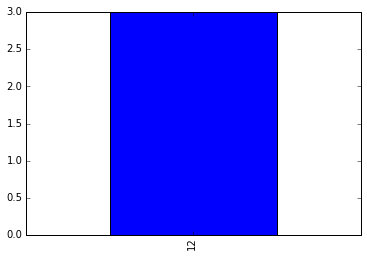

In [77]:
hobbit.month_of_year.value_counts().plot(kind='bar')

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

In [25]:
release_dates.head(2)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05


In [26]:
r1 = release_dates[release_dates.title.str.contains('Romance')]

In [27]:
r1['day'] = r1.date.dt.dayofweek

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [28]:
r1.head()

,title,year,country,date,day
765,100% OFF: A Recession-Era Romance,2012,USA,2012-07-04,2
5291,A Blue Gum Romance,1913,Australia,1913-09-20,5
5460,A California Romance,1922,USA,1922-12-24,6
5671,A Circus Romance,1916,USA,1916-01-24,0
5794,A Crooked Romance,1917,USA,1917-09-30,6


In [29]:
import calendar

In [30]:
r1.groupby('day').size()

day
0    56
1    13
2    32
3    48
4    88
5    16
6    44
dtype: int64

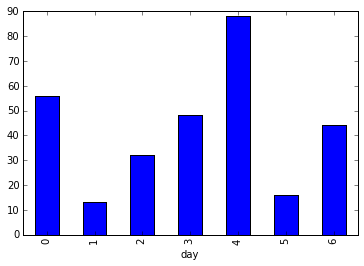

In [31]:
r1.groupby('day').size().plot(kind='bar')  #way 1

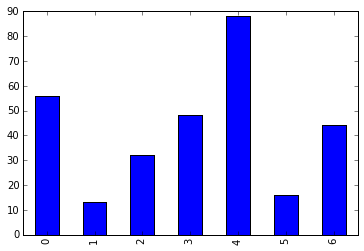

In [107]:
r1.day.value_counts().sort_index().plot(kind='bar') #way 2

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

In [32]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.head(5)

,title,year,country,date
5674,A Civil Action,1998,USA,1999-01-08
7477,A Man of Action,1923,USA,1923-06-03
11535,Ace of Action,1926,USA,1926-11-28
11768,Action,1921,USA,1921-09-12
11774,Action Galore,1925,USA,1925-11-03


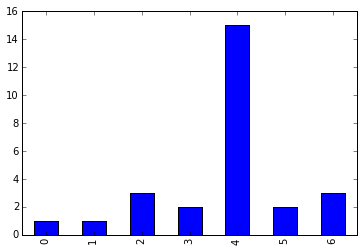

In [110]:
action.date.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [38]:
release_dates.head(3)

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#AnonOccupy: Bio of a Villain,2015,USA,2015-11-05
2,#Beings,2015,Romania,2015-01-29


In [114]:
judi = cast[ (cast.name == 'Judi Dench') & (cast.year >= 1990) & (cast.year < 2000) ]
judi.head(10)

,title,year,name,type,character,n
2449996,GoldenEye,1995,Judi Dench,actress,M,6
2449997,Hamlet,1996,Judi Dench,actress,Hecuba,12
2450003,Jack & Sarah,1995,Judi Dench,actress,Margaret,3
2450008,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1
2450020,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12
2450023,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2
2450031,The World Is Not Enough,1999,Judi Dench,actress,M,6
2450032,Tomorrow Never Dies,1997,Judi Dench,actress,M,9


In [133]:
judi = judi.merge(release_dates[release_dates.country == 'USA'])
judi.head(5)

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6,USA,1995-11-17
1,Hamlet,1996,Judi Dench,actress,Hecuba,12,USA,1996-12-25
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3,USA,1996-03-22
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1,USA,1997-07-18
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12,USA,1999-01-08


In [134]:
judi.sort_values('date')[['title','date']]

,title,date
0,GoldenEye,1995-11-17
2,Jack & Sarah,1996-03-22
1,Hamlet,1996-12-25
3,Mrs Brown,1997-07-18
7,Tomorrow Never Dies,1997-12-19
4,Shakespeare in Love,1999-01-08
5,Tea with Mussolini,1999-05-14
6,The World Is Not Enough,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

In [156]:
judi2 = cast[(cast.name == 'Judi Dench')]
len(judi2)

51

In [161]:
judi2 = judi2.merge(release_dates[release_dates.country == 'USA'])
len(judi2)

32

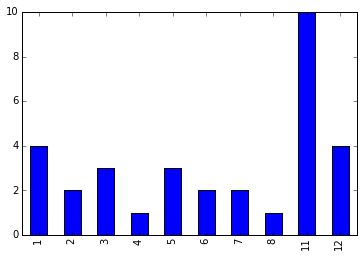

In [167]:
judi2.date.dt.month.value_counts().sort_index().plot(kind='bar')

### In which months do films with Tom Cruise tend to be released in the USA?

In [168]:
tom = cast[cast.name == 'Tom Cruise']
tom.head(5)

,title,year,name,type,character,n
436527,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1
436528,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1
436529,August,2008,Tom Cruise,actor,Himself,NaN
436530,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81
436531,Austin Powers in Goldmember,2002,Tom Cruise,actor,Famous Austin ('Austinpussy'),81


In [169]:
tom = tom.merge(release_dates[release_dates.country == 'USA'])
tom.head(3)

,title,year,name,type,character,n,country,date
0,A Few Good Men,1992,Tom Cruise,actor,Lt. Daniel Kaffee,1,USA,1992-12-11
1,All the Right Moves,1983,Tom Cruise,actor,Stefen Djordjevic,1,USA,1983-10-21
2,Austin Powers in Goldmember,2002,Tom Cruise,actor,Himself,81,USA,2002-07-26


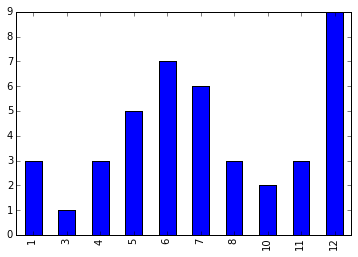

In [174]:
tom.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Extra queries

In [42]:
release_dates.groupby('country').size().sort_values(ascending=False).head()

country
USA         40908
France      22406
Finland     18518
Portugal    18151
Sweden      16655
dtype: int64

In [43]:
#show names of all movies with christmas in title released in october
xmas['day_of_month'] = xmas.date.dt.day
xmas[xmas.month_of_year == 10].sort_values('date')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,title,year,country,date,month_of_year,day_of_month
57547,Christmas in July,1940,USA,1940-10-18,10,18
57506,Christmas Eve,1947,USA,1947-10-31,10,31
47876,Bush Christmas,1947,Finland,1948-10-22,10,22
388206,White Christmas,1954,USA,1954-10-14,10,14
38523,Black Christmas,1974,Canada,1974-10-11,10,11
38525,Black Christmas,1974,UK,1975-10-12,10,12
38526,Black Christmas,1974,West Germany,1975-10-24,10,24
202356,Merry Christmas Mr. Lawrence,1983,Finland,1983-10-14,10,14
338722,The Nightmare Before Christmas,1993,USA,1993-10-29,10,29
338724,The Nightmare Before Christmas,1993,Japan,1994-10-15,10,15


In [44]:
# movies with Christmas in title, released in USA between February and September
xmas[(xmas.title.str.contains('Christmas')) & (xmas.month_of_year > 1) & (xmas.month_of_year < 10) & (xmas.country == 'USA')].sort_values('date')

,title,year,country,date,month_of_year,day_of_month
57511,Christmas Holiday,1944,USA,1944-06-30,6,30
57542,Christmas in Connecticut,1945,USA,1945-08-11,8,11
202354,Merry Christmas Mr. Lawrence,1983,USA,1983-09-02,9,2
57520,Christmas Nightmare,2001,USA,2001-05-01,5,1
222474,Nothing for Christmas,2011,USA,2011-02-02,2,2
5452,A Cadaver Christmas,2011,USA,2011-04-02,4,2
164202,Krampus: The Christmas Devil,2013,USA,2013-08-17,8,17
190762,"Love, Guns & Christmas",2015,USA,2015-07-04,7,4


In [45]:
#change month_of_year from number to name
xmas.month_of_year = xmas.month_of_year.dt.

SyntaxError: invalid syntax (<ipython-input-45-99032521c94e>, line 2)